In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext, Row
import pandas as pd
import numpy as np

In [2]:
sc = SparkContext( 'local' )
sqlCtx = SQLContext( sc )

# CSV 읽기
- 바로 **데이터 프레임** 형태로 변환
- RDD로 변환 후 데이터 프레임으로 변환할 필요가 없음

- inferSchema = True
    - infers the input schema **automatically** from data.

In [10]:
cctv_df = sqlCtx.read.csv(path   = '../data/data1/CCTV_in_Seoul.csv',
                          header = True,
                          inferSchema = True)
cctv_df.show(5)

+------+----+-------------+------+------+------+
|기관명|소계|2013년도 이전|2014년|2015년|2016년|
+------+----+-------------+------+------+------+
|강남구|2780|         1292|   430|   584|   932|
|강동구| 773|          379|    99|   155|   377|
|강북구| 748|          369|   120|   138|   204|
|강서구| 884|          388|   258|   184|    81|
|관악구|1496|          846|   260|   390|   613|
+------+----+-------------+------+------+------+
only showing top 5 rows



In [11]:
cctv_df.printSchema()

root
 |-- 기관명: string (nullable = true)
 |-- 소계: integer (nullable = true)
 |-- 2013년도 이전: integer (nullable = true)
 |-- 2014년: integer (nullable = true)
 |-- 2015년: integer (nullable = true)
 |-- 2016년: integer (nullable = true)



## Groupby
- 한글 컬럼은 `줘야 함

In [13]:
grade_df = sqlCtx.read.csv(path='../data/grade.csv',
                          header=True,
                         inferSchema=True)
grade_df.show(5)

+-----+----+-----+----+----+
| 학년|과목| 결과|중간|기말|
+-----+----+-----+----+----+
|1학년|국어| 좋음|  80|  90|
|1학년|국어| 나쁨|  50|  40|
|1학년|국어| 나쁨|  20|  50|
|1학년|수학| 좋음|  83|  95|
|1학년|수학| 좋음|  93|  86|
+-----+----+-----+----+----+
only showing top 5 rows



In [23]:
grade_df.createOrReplaceTempView( 'grade' ) # 데이터 프레임에 이름 설정

In [33]:
sqlCtx.sql("select avg(`중간`) from grade" ).show()

+-----------------+
|        avg(중간)|
+-----------------+
|68.66666666666667|
+-----------------+



In [38]:
sqlCtx.sql("select `학년`, avg(`중간`) as `중간 평균` from grade group by `학년` order by `학년` " ).show()

+-----+---------+
| 학년|중간 평균|
+-----+---------+
|1학년|     65.2|
|2학년|     73.0|
+-----+---------+



In [ ]:
RDD 의 transfomation, action 을 이용하여 
아래 1,2번을 구하시요.
========================

1. k.txt(data1폴더아래) 에 있는 단어의
갯수를 구하시요.

2. births.txt(data폴더아래) 파일을 이용하여 구하시요
1) 남아수의 합과 평균을 구하시요
2) 여아수의 합과 평균을 구하시요
3) 남아수가 높은 탑 5를 구하시요
4) 전체 남아수의 비율을 구하시요.
5) 여아수를 10등분 했을때 각계급의 수를
구하시요

========================
spark sql 을 이용하여 아래를 구하시요.

cctv 문제
1. 기관명이 '강'글자가 포함된  데이터를
가져오시요
2. 기관명, cctv증가율 을 출력하시요.
증가율:  (14+15+16)/(2013년이전 )
3. 증가율이 가장높은 top 5를 보여주시요
4. 기관이라는 컬럼을 만들고
기관명에서 마지막 '구'라는 글자를 제한 
글자로 데이터를 구성하시요(예)강남,강동,강북....
5. 2015년도 cctv 총합을 구하시요.
6. 2014년도 2015년도 cctv데이터에 대한 
바차트를 그리시요(x축 기관명임)
7. cctv가 가장많은 기관명과 갯수를 구하시요
8. 현황이라는 컬럼을 추가하고 cctv총갯수가
1500개 이상이면 '매우많음' 1000개이상이면 '많음' 나머지
보통으로 표시하시요
 
grade 문제
=====================
1. 학년별 과목별 중간,기말 총합과 평균을 구하시요
2. 학년별 중간고사 평균이 70점이상인 값을 구하시요.

In [ ]:
RDD 의 transfomation, action 을 이용하여 
아래 1,2번을 구하시요.
========================

1. k.txt(data1폴더아래) 에 있는 단어의
갯수를 구하시요.

2. births.txt(data폴더아래) 파일을 이용하여 구하시요
1) 남아수의 합과 평균을 구하시요
2) 여아수의 합과 평균을 구하시요
3) 남아수가 높은 탑 5를 구하시요
4) 전체 남아수의 비율을 구하시요.
5) 여아수를 10등분 했을때 각계급의 수를
구하시요

In [40]:
rdd = sc.textFile('../data/data1/k.txt')
# rdd.collect()

## rdd문제 1

In [113]:
rdd.flatMap(lambda x: x.split()).\
    map( lambda x:(x, 1) ).\
    reduceByKey(lambda a,b:a+b).\
    sortBy(lambda v: v[1], ascending=False ).\
    take(10)

[('원내대표는', 7),
 ('질문에', 7),
 ('것은', 5),
 ('여야', 4),
 ('하는', 4),
 ('말했다.', 4),
 ('3당', 3),
 ('위해', 3),
 ('문', 3),
 ('이인영', 3)]

## rdd문제 2

In [ ]:
2. births.txt(data폴더아래) 파일을 이용하여 구하시요
1) 남아수의 합과 평균을 구하시요
2) 여아수의 합과 평균을 구하시요
3) 남아수가 높은 탑 5를 구하시요
4) 전체 남아수의 비율을 구하시요.
5) 여아수를 10등분 했을때 각계급의 수를
구하시요

In [169]:
rdd2 = sc.textFile('../data/births.txt')
# 연도 남아 여아
rdd2.take(10)

['1880, 90993, 110491',
 '1881, 91954, 100745',
 '1882, 107850, 113688',
 '1883, 112321, 104629',
 '1884, 129022, 114445',
 '1885, 133055, 107800',
 '1886, 144535, 110784',
 '1887, 145982, 101414',
 '1888, 178627, 120853',
 '1889, 178366, 110584']

In [170]:
# 1) 남아수의 합과 평균을 구하시요
boys_rdd = rdd2.map( lambda x: x.split(',')).map( lambda x: int(x[1]) )
boys_rdd.sum(), round( boys_rdd.mean(), 2 )

(161802441, 1225776.07)

In [171]:
# 2) 여아수의 합과 평균을 구하시요
girls_rdd = rdd2.map( lambda x: x.split(',')).map( lambda x: int(x[2]) )
girls_rdd.sum(), round( girls_rdd.mean(), 2 )

(164392696, 1245399.21)

In [114]:
# 3) 남아수가 높은 탑 5를 구하시요
rdd2.map( lambda x: x.split(',')).\
        map( lambda x: ( x[0], int( x[1]) ) ).\
        sortBy(lambda x: x[1], ascending=False ).take(5)

[('1957', 2044160),
 ('1959', 2023044),
 ('1960', 2022093),
 ('1961', 2017316),
 ('1958', 2010884)]

In [302]:
# 4) 전체 남아수의 비율을 구하시요.

# 남아수 비율이 가장 높았던 해
rdd2.map( lambda x: x.split(',')).\
        map( lambda x: ( x[0], int(x[1]), int(x[2]) ) ).\
        map( lambda x: (x[0], round( x[1] / (x[1]+x[2]), 3)) ).sortBy(lambda x: x[1] , ascending=False).take(10)

[('1901', 0.692),
 ('1906', 0.689),
 ('1905', 0.688),
 ('1899', 0.687),
 ('1903', 0.687),
 ('1907', 0.685),
 ('1908', 0.684),
 ('1902', 0.683),
 ('1904', 0.682),
 ('1909', 0.679)]

In [304]:
rdd2.map( lambda x: x.split(',')).\
        map( lambda x: ( x[0], int(x[1]), int(x[2]) ) ).\
        map( lambda x: (x[0], round( x[1] / (x[1]+x[2]), 3)) ).collect()

[('1880', 0.452),
 ('1881', 0.477),
 ('1882', 0.487),
 ('1883', 0.518),
 ('1884', 0.53),
 ('1885', 0.552),
 ('1886', 0.566),
 ('1887', 0.59),
 ('1888', 0.596),
 ('1889', 0.617),
 ('1890', 0.632),
 ('1891', 0.647),
 ('1892', 0.635),
 ('1893', 0.655),
 ('1894', 0.658),
 ('1895', 0.666),
 ('1896', 0.666),
 ('1897', 0.675),
 ('1898', 0.678),
 ('1899', 0.687),
 ('1900', 0.666),
 ('1901', 0.692),
 ('1902', 0.683),
 ('1903', 0.687),
 ('1904', 0.682),
 ('1905', 0.688),
 ('1906', 0.689),
 ('1907', 0.685),
 ('1908', 0.684),
 ('1909', 0.679),
 ('1910', 0.671),
 ('1911', 0.649),
 ('1912', 0.565),
 ('1913', 0.549),
 ('1914', 0.538),
 ('1915', 0.537),
 ('1916', 0.54),
 ('1917', 0.539),
 ('1918', 0.533),
 ('1919', 0.536),
 ('1920', 0.53),
 ('1921', 0.528),
 ('1922', 0.525),
 ('1923', 0.524),
 ('1924', 0.524),
 ('1925', 0.522),
 ('1926', 0.516),
 ('1927', 0.514),
 ('1928', 0.51),
 ('1929', 0.509),
 ('1930', 0.506),
 ('1931', 0.506),
 ('1932', 0.505),
 ('1933', 0.504),
 ('1934', 0.503),
 ('1935', 0.502

In [103]:
# 5) 여아수를 10등분 했을때 각계급의 수를 구하시요
a,b = rdd2.map( lambda x: x.split(',')).\
        map( lambda x: int(x[2]) ).histogram( 10 ) 
# b # 도수
a  # 계급

[100745.0,
 306257.1,
 511769.2,
 717281.3,
 922793.4,
 1128305.5,
 1333817.6,
 1539329.7,
 1744841.8,
 1950353.9000000001,
 2155866]

In [ ]:
# rdd 문제 1
rdd = sc.textFile('../data/data1/k.txt')
rdd.flatMap(lambda x: x.split()).\
    map( lambda x:(x, 1) ).\
    reduceByKey(lambda a,b:a+b).\
    sortBy(lambda v: v[1], ascending=False ).\
    take(10) # 단어 높은 빈도순 10개 추출

# rdd 문제 2
rdd2 = sc.textFile('../data/births.txt')

# 1) 남아수의 합과 평균을 구하시요
boys_rdd = rdd2.map( lambda x: x.split(',')).map( lambda x: int(x[1]) )
boys_rdd.sum(), round( boys_rdd.mean(), 2 )

# 2) 여아수의 합과 평균을 구하시요
girls_rdd = rdd2.map( lambda x: x.split(',')).map( lambda x: int(x[2]) )
girls_rdd.sum(), round( girls_rdd.mean(), 2 )

# 3) 남아수가 높은 탑 5를 구하시요
rdd2.map( lambda x: x.split(',')).\
        map( lambda x: ( x[0], int( x[1]) ) ).\
        sortBy( lambda x: x[1], ascending=False ).take(5)

# 4) 전체 남아수의 비율을 구하시요.
rdd2.map( lambda x: x.split(',')).\
        map( lambda x: ( x[0], int(x[1]), int(x[2]) ) ).\
        map( lambda x: (x[:], round( x[1] / (x[1]+x[2]), 3)) ).collect() # 연도, 남아수, 여아수, 남아율

# 5) 여아수를 10등분 했을때 각계급의 수를 구하시요
a,b = rdd2.map( lambda x: x.split(',')).\
        map( lambda x: int(x[2]) ).histogram( 10 ) 
# b # 도수
a  # 계급

## Spark sql

In [117]:
cctv_df = sqlCtx.read.csv(path   = '../data/data1/CCTV_in_Seoul.csv',
                          header = True,
                          inferSchema = True)
cctv_df.show(5)
cctv_df.createOrReplaceTempView( 'cctv_df' )

+------+----+-------------+------+------+------+
|기관명|소계|2013년도 이전|2014년|2015년|2016년|
+------+----+-------------+------+------+------+
|강남구|2780|         1292|   430|   584|   932|
|강동구| 773|          379|    99|   155|   377|
|강북구| 748|          369|   120|   138|   204|
|강서구| 884|          388|   258|   184|    81|
|관악구|1496|          846|   260|   390|   613|
+------+----+-------------+------+------+------+
only showing top 5 rows



# 1.
- 기관명이 '강'글자가 포함된  데이터를 가져오시요

In [257]:
# solution 1
sqlCtx.sql( "select * from cctv_df where `기관명` like '%강%' " ).show()

+------+----+-------------+------+------+------+
|기관명|소계|2013년도 이전|2014년|2015년|2016년|
+------+----+-------------+------+------+------+
|강남구|2780|         1292|   430|   584|   932|
|강동구| 773|          379|    99|   155|   377|
|강북구| 748|          369|   120|   138|   204|
|강서구| 884|          388|   258|   184|    81|
+------+----+-------------+------+------+------+



In [258]:
# solution 2 -> Hive ql 정규식 사용
sqlCtx.sql( "select * from cctv_df where `기관명` rlike '강' " ).show()

+------+----+-------------+------+------+------+
|기관명|소계|2013년도 이전|2014년|2015년|2016년|
+------+----+-------------+------+------+------+
|강남구|2780|         1292|   430|   584|   932|
|강동구| 773|          379|    99|   155|   377|
|강북구| 748|          369|   120|   138|   204|
|강서구| 884|          388|   258|   184|    81|
+------+----+-------------+------+------+------+



In [259]:
cctv_df.columns

['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년']

# 2. 
- 기관명, cctv증가율 을 출력하시요.
- 증가율:  (14+15+16)/(2013년이전 )

In [281]:
sqlCtx.sql('''
            select 
                `기관명`,
                round( (`2014년`+`2015년`+`2016년`/`2013년도 이전`), 2 ) as `증가율`
            from 
                cctv_df
            ''' ).show()

+--------+-------+
|  기관명| 증가율|
+--------+-------+
|  강남구|1014.72|
|  강동구| 254.99|
|  강북구| 258.55|
|  강서구| 442.21|
|  관악구| 650.72|
|  광진구|  131.3|
|  구로구| 419.28|
|  금천구| 320.53|
|  노원구| 508.95|
|  도봉구| 202.62|
|동대문구| 221.54|
|  동작구| 444.58|
|  마포구| 288.21|
|서대문구| 118.35|
|  서초구| 493.28|
|  성동구| 332.36|
|  성북구|  438.2|
|  송파구|  89.88|
|  양천구| 172.25|
|영등포구| 409.75|
+--------+-------+
only showing top 20 rows



# 3. 
- 증가율이 가장높은 top 5를 보여주시요

In [283]:
sqlCtx.sql('''
            select 
                `기관명`,
                round( (`2014년`+`2015년`+`2016년`/`2013년도 이전`), 2 ) as `증가율`
            from 
                cctv_df
            order by 
                `증가율` desc
            limit 5
            ''' ).show()

+------+-------+
|기관명| 증가율|
+------+-------+
|강남구|1014.72|
|관악구| 650.72|
|종로구| 526.36|
|노원구| 508.95|
|은평구| 502.41|
+------+-------+



# 4. 
기관이라는 컬럼을 만들고
기관명에서 마지막 '구'라는 글자를 제한 
글자로 데이터를 구성하시요(예)강남,강동,강북....

In [287]:
# 4번
cctv_df = sqlCtx.read.csv(path   = '../data/data1/CCTV_in_Seoul.csv',
                          header = True,
                          inferSchema = True)

cctv_df.createOrReplaceTempView( 'cctv_df' )

sqlCtx.sql( '''
            select 
                regexp_replace( `기관명`, '구$', '' ) as `기관` ,
                * 
            from 
                cctv_df
            ''').show()

+------+--------+----+-------------+------+------+------+
|  기관|  기관명|소계|2013년도 이전|2014년|2015년|2016년|
+------+--------+----+-------------+------+------+------+
|  강남|  강남구|2780|         1292|   430|   584|   932|
|  강동|  강동구| 773|          379|    99|   155|   377|
|  강북|  강북구| 748|          369|   120|   138|   204|
|  강서|  강서구| 884|          388|   258|   184|    81|
|  관악|  관악구|1496|          846|   260|   390|   613|
|  광진|  광진구| 707|          573|    78|    53|   174|
|  구로|  구로구|1561|         1142|   173|   246|   323|
|  금천|  금천구|1015|          674|    51|   269|   354|
|  노원|  노원구|1265|          542|    57|   451|   516|
|  도봉|  도봉구| 485|          238|   159|    42|   386|
|동대문|동대문구|1294|         1070|    23|   198|   579|
|  동작|  동작구|1091|          544|   341|   103|   314|
|  마포|  마포구| 574|          314|   118|   169|   379|
|서대문|서대문구| 962|          844|    50|    68|   292|
|  서초|  서초구|1930|         1406|   157|   336|   398|
|  성동|  성동구|1062|          730|    91|   241|   2

# 5. 
2015년도 cctv 총합을 구하시요.

In [151]:
sqlCtx.sql("select sum(`2015년`) as `2015년 cctv 총합` from cctv_df").show()

+----------------+
|2015년 cctv 총합|
+----------------+
|            5130|
+----------------+



# 6.
2014년도 2015년도 cctv데이터에 대한 바차트를 그리시요(x축 기관명임)

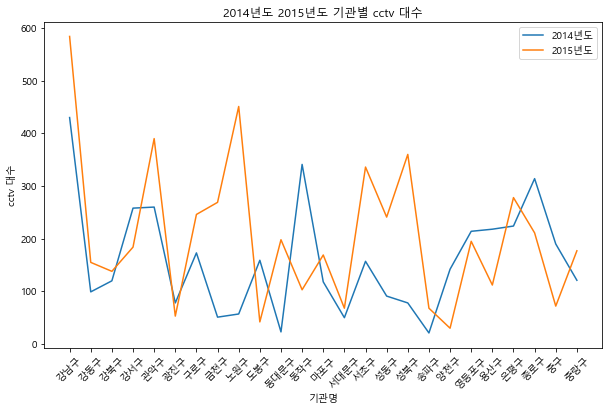

In [150]:
sql6_df = sqlCtx.sql("select `기관명`, `2014년`, `2015년`  from cctv_df ").toPandas()

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure( figsize = (10,6) )
plt.xticks( rotation = 45  )

plt.xlabel( '기관명' )
plt.ylabel( 'cctv 대수')
plt.title( '2014년도 2015년도 기관별 cctv 대수' )
plt.plot(  sql6_df['기관명'], sql6_df['2014년'] )
plt.plot(  sql6_df['기관명'], sql6_df['2015년'] )

plt.legend( ['2014년도','2015년도'] )
plt.show()

# 7. 
cctv가 가장많은 기관명과 갯수를 구하시요

In [286]:
sqlCtx.sql( '''
            select 
                *
            from 
                cctv_df
            where 
                `소계` == (select max(`소계`) from cctv_df )
            ''').show()

+------+----+-------------+------+------+------+
|기관명|소계|2013년도 이전|2014년|2015년|2016년|
+------+----+-------------+------+------+------+
|강남구|2780|         1292|   430|   584|   932|
+------+----+-------------+------+------+------+



# 8.
현황이라는 컬럼을 추가하고 cctv총갯수가
1500개 이상이면 '매우많음' 1000개이상이면 '많음' 나머지
보통으로 표시하시요

In [179]:
# cctv_df.show()
sqlCtx.sql( '''
            select *, 
            case
                when `소계` >= 1500 then '매우 많음'
                when `소계` >= 1000 then '많음'
                else '보통'
            end as `cctv대수 정도`
            from cctv_df
            ''').show()

+--------+----+-------------+------+------+------+-------------+
|  기관명|소계|2013년도 이전|2014년|2015년|2016년|cctv대수 정도|
+--------+----+-------------+------+------+------+-------------+
|  강남구|2780|         1292|   430|   584|   932|    매우 많음|
|  강동구| 773|          379|    99|   155|   377|         보통|
|  강북구| 748|          369|   120|   138|   204|         보통|
|  강서구| 884|          388|   258|   184|    81|         보통|
|  관악구|1496|          846|   260|   390|   613|         많음|
|  광진구| 707|          573|    78|    53|   174|         보통|
|  구로구|1561|         1142|   173|   246|   323|    매우 많음|
|  금천구|1015|          674|    51|   269|   354|         많음|
|  노원구|1265|          542|    57|   451|   516|         많음|
|  도봉구| 485|          238|   159|    42|   386|         보통|
|동대문구|1294|         1070|    23|   198|   579|         많음|
|  동작구|1091|          544|   341|   103|   314|         많음|
|  마포구| 574|          314|   118|   169|   379|         보통|
|서대문구| 962|          844|    50|    68|   292|

# grade 문제

- 1. 학년별 과목별 중간,기말 총합과 평균을 구하시요
- 2. 학년별 중간고사 평균이 70점이상인 값을 구하시요.

In [180]:
grade_df = sqlCtx.read.csv(path='../data/grade.csv',
                          header=True,
                         inferSchema=True)
grade_df.createOrReplaceTempView( 'grade' ) # 데이터 프레임에 이름 설정

+-----+----+-----+----+----+
| 학년|과목| 결과|중간|기말|
+-----+----+-----+----+----+
|1학년|국어| 좋음|  80|  90|
|1학년|국어| 나쁨|  50|  40|
|1학년|국어| 나쁨|  20|  50|
|1학년|수학| 좋음|  83|  95|
|1학년|수학| 좋음|  93|  86|
+-----+----+-----+----+----+
only showing top 5 rows



In [212]:
grade_df.printSchema()

root
 |-- 학년: string (nullable = true)
 |-- 과목: string (nullable = true)
 |-- 결과: string (nullable = true)
 |-- 중간: integer (nullable = true)
 |-- 기말: integer (nullable = true)



In [290]:
# 1번
sqlCtx.sql( '''
            select 
                `학년`, 
                `과목`, 
                sum(`중간`) as `중간고사 총합`, 
                sum(`중간`) as `기말고사 총합`,
                avg(`중간`) as `중간고사 평균`, 
                avg(`중간`) as `기말고사 평균`
            from 
                grade 
            group by 
                `학년`, `과목` 
            order by 
                `학년`, `과목`
            ''').show()

+-----+----+-------------+-------------+-------------+-------------+
| 학년|과목|중간고사 총합|기말고사 총합|중간고사 평균|기말고사 평균|
+-----+----+-------------+-------------+-------------+-------------+
|1학년|국어|          150|          150|         50.0|         50.0|
|1학년|수학|          176|          176|         88.0|         88.0|
|2학년|국어|          139|          139|         69.5|         69.5|
|2학년|수학|          153|          153|         76.5|         76.5|
+-----+----+-------------+-------------+-------------+-------------+



In [288]:
#  2. 학년별 중간고사 평균이 70점이상인 값을 구하시요.
sqlCtx.sql('''
        select `학년`,
                avg(`중간`) as `중간 평균`   
        from 
            grade
        group by 
            `학년` 
        having 
            `중간 평균` >= 70
        ''' ).show()

+-----+---------+
| 학년|중간 평균|
+-----+---------+
|2학년|     73.0|
+-----+---------+

